# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1182.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.60e-43
Time:                        13:19:48   Log-Likelihood:                 7.2408
No. Observations:                  50   AIC:                            -6.482
Df Residuals:                      46   BIC:                             1.166
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9761      0.074     66.889      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.42616971  4.92736044  5.38757951  5.77871147  6.08278754  6.29493794
  6.42419188  6.49199417  6.52868186  6.56849992  6.64397496  6.78057113
  6.99250649  7.28041696  7.63125191  8.02041828  8.41582119  8.78313703
  9.09145271  9.31834463  9.45356278  9.5007148   9.47667327  9.40880357
  9.33046784  9.27554365  9.27285807  9.3414514   9.48744892  9.70305454
  9.96783169 10.25206092 10.52162281 10.74360364 10.89170303 10.95055502
 10.91825267 10.80666134 10.63946926 10.4482956  10.26749558 10.12851594
 10.05472839 10.05758963 10.13475915 10.27048365 10.43818538 10.60482869
 10.73634776 10.80324347]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.76871868 10.59728908 10.30918588  9.95051344  9.58196132  9.26394534
  9.04181572  8.93475373  8.93107545  8.99109242]


## Plot comparison

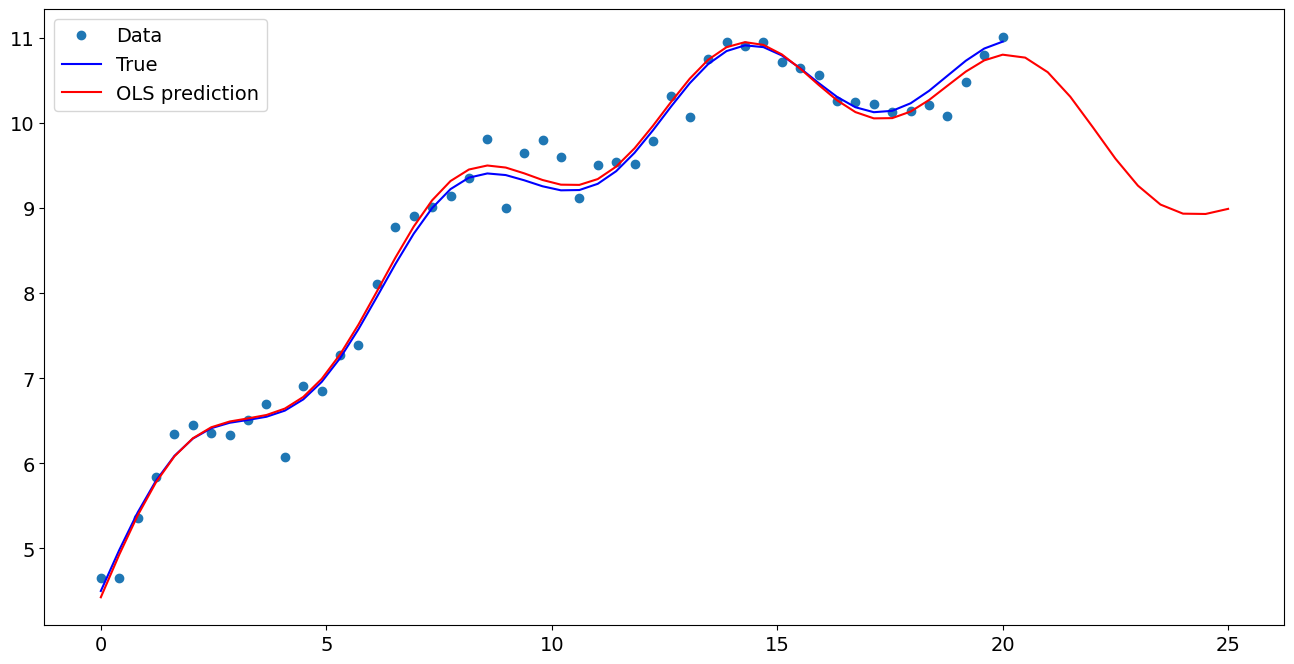

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.976053
x1                  0.515258
np.sin(x1)          0.515889
I((x1 - 5) ** 2)   -0.021995
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.768719
1    10.597289
2    10.309186
3     9.950513
4     9.581961
5     9.263945
6     9.041816
7     8.934754
8     8.931075
9     8.991092
dtype: float64